In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## 1.讀入 Fashion MNIST 數據集

In [4]:
#import tensorflow as tf

#### 終端機更新，就解除Error
https://stackoverflow.com/questions/51724309/attributeerror-module-tensorflow-has-no-attribute-name-scope-with-keras
* pip install --upgrade pip setuptools wheel
* pip install -I tensorflow
* pip install -I keras

In [5]:
# Error
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist

Using TensorFlow backend.


In [6]:
# 法二(課本)
#fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train.shape #60000張圖片，每張是28x28

(60000, 28, 28)

In [9]:
x_train.dtype

dtype('uint8')

## 2.查看數據集內容

In [10]:
n = 1996
print("It's ", y_train[n])

It's  1


In [11]:
# 把數字轉換成對應的類別
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

It's  Trouser


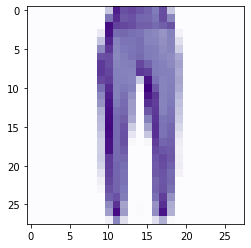

In [12]:
n = 1996
print("It's ", class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Purples')

### replace
* replace=True: 可以从a 中反复选取同一个元素。
* replace=False: a 中同一个元素只能被选取一次。

### subplot
subplot(2, 3, 3)=subplot(233)

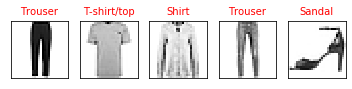

In [21]:
import random
pick = np.random.choice(60000, 5, replace=False) # 60000個裡面隨機選 5個出來

for i in range(5):
    n = pick[i]
    #plt.figure(figsize = (20,20))
    ax = plt.subplot(151+i) #151代表一列五行，i代表從左邊數來第幾個
    ax.set_xticks([]) #橫坐標為空值
    ax.set_yticks([]) #縱坐標為空值
    ax.set_title(class_names[y_train[n]], fontsize=10, color='r')
    plt.imshow(x_train[n], cmap='Greys')

## 3.整理資料

In [25]:
x_train
x_test[1996]
# 所以不用壓縮? Nope

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  22,
          0,   0,   0,   0,  34,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 161, 205, 196,
        164, 209, 149, 164, 189, 130,  24,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144, 195, 188,
        189, 211, 199, 186, 181, 170,  37,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 185, 209,
        191, 167, 167, 171, 208, 191,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 164, 229, 219,
        231, 214, 220, 211, 221, 191,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 196, 229, 211,
        219, 209, 217, 213, 207, 205,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [26]:
x_train = x_train/55
x_test = x_test/255

In [28]:
x_train[1996]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.54545455, 4.2       , 3.49090909, 3.58181818, 3.4       ,
        3.23636364, 2.90909091, 3.50909091, 1.54545455, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.01818182, 3.98181818, 3.38181818, 3.47272727, 3.2       ,
        3.16363636, 3.        , 3.54545455, 2.70909091, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        4.43636364, 3.67272727, 3.6       , 3.52727273, 3.29090909,
        3.29090909, 3.1454

## 4.打造神經網路

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.summary()
# 235500 = 784 * 300 + 300

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.layers

In [37]:
model.layers[2].name

'dense_2'

In [38]:
model.get_layer('dense_3').name

'dense_3'

In [56]:
#Error
weights, biases = model.get_weights()

ValueError: too many values to unpack (expected 2)

In [57]:
# 直接调出所有weights和bias
weights = model.get_weights()

In [58]:
model.get_weights()[5] #dense_3的weights

array([ 0.0038802 , -0.14778456,  0.18315585,  0.23002547, -0.35581413,
       -0.00744237,  0.22422393,  0.10167295, -0.07548056, -0.15644194],
      dtype=float32)

In [59]:
weights

[array([[-0.00485522,  0.06675908,  0.01972842, ...,  0.02646462,
          0.03574827, -0.01503596],
        [ 0.04498195, -0.00154321, -0.01459563, ...,  0.02219802,
          0.06071515,  0.04640538],
        [ 0.04516356, -0.01754917,  0.03314548, ...,  0.06192481,
          0.01669499, -0.05090718],
        ...,
        [ 0.00876202, -0.02903426,  0.04134344, ...,  0.00297316,
         -0.05086133,  0.0500694 ],
        [-0.00282734,  0.0397285 , -0.00020264, ..., -0.04780283,
          0.01218987, -0.04365636],
        [-0.00387125, -0.04244172,  0.03587386, ..., -0.05544654,
          0.07079292,  0.05486284]], dtype=float32),
 array([ 4.5423768e-02,  1.0676027e-02,  5.5175457e-02,  3.8929448e-02,
        -1.7945050e-03, -5.8943446e-04,  2.7124947e-02, -2.5083700e-02,
         6.1089145e-03,  2.7246224e-02,  4.6569180e-02,  4.9425744e-02,
        -3.8916513e-02, -3.2438615e-03, -3.6989566e-02,  2.9740741e-02,
         1.7635329e-03,  2.7021809e-02, -2.5261698e-02,  1.2187910e-02

In [60]:
weights.shape

AttributeError: 'list' object has no attribute 'shape'

## 5.組裝

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

## 6. 訓練

### 參考https://www.itread01.com/content/1541581923.html
* 1. batchsize：批大小。在深度學習中，一般採用SGD訓練，即每次訓練在訓練集中取batchsize個樣本訓練
* 2. iteration：1個iteration等於使用batchsize個樣本訓練一次；batch 需要完成一個 epoch 的次數。記住：在一個 epoch 中，batch 數和迭代數是相等的
* 3. epoch：1個epoch等於使用訓練集中的全部樣本訓練一次

In [43]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.5340 - accuracy: 0.8128
Epoch 2/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.4008 - accuracy: 0.8576
Epoch 3/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.3608 - accuracy: 0.8698
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.3353 - accuracy: 0.8785
Epoch 5/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.3173 - accuracy: 0.8842
Epoch 6/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.3011 - accuracy: 0.8895
Epoch 7/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.2901 - accuracy: 0.8934
Epoch 8/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.2776 - accuracy: 0.8991
Epoch 9/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.2667 - accuracy: 0.9022
Epoch 10/30
60000/60000 [==============================

## 7. Learning Curves

<function matplotlib.pyplot.show(*args, **kw)>

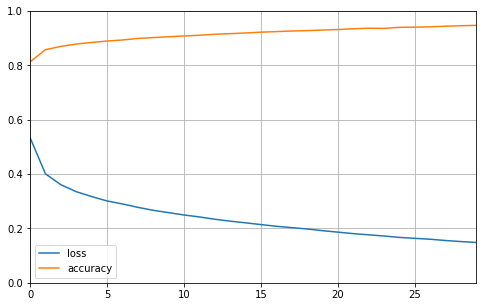

In [63]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show

## 8.切出驗證集，來確定是否overfitting

In [79]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [80]:
x_train = x_train/55
x_test = x_test/255

In [81]:
x_valid, x_train = x_train[:5000], x_train[5000:] #因為前面已經除以過255，所以這邊不用除
y_valid, y_train = y_train[:5000], y_train[5000:]

In [82]:
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[1996]]

'Ankle boot'

In [83]:
# check answers
y_train[1996]

9

In [84]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [85]:
# Error
#weights, biases = model.get_weights

In [86]:
model_2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#### 放入驗證集

In [87]:
history_2 = model_2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 61us/step - loss: 0.5525 - accuracy: 0.8076 - val_loss: 0.4668 - val_accuracy: 0.8432
Epoch 2/30
55000/55000 [==============================] - 3s 55us/step - loss: 0.4056 - accuracy: 0.8558 - val_loss: 0.3990 - val_accuracy: 0.8570
Epoch 3/30
55000/55000 [==============================] - 3s 58us/step - loss: 0.3631 - accuracy: 0.8707 - val_loss: 0.3528 - val_accuracy: 0.8736
Epoch 4/30
55000/55000 [==============================] - 3s 54us/step - loss: 0.3363 - accuracy: 0.8786 - val_loss: 0.3421 - val_accuracy: 0.8766
Epoch 5/30
55000/55000 [==============================] - 3s 59us/step - loss: 0.3179 - accuracy: 0.8849 - val_loss: 0.3440 - val_accuracy: 0.8790
Epoch 6/30
55000/55000 [==============================] - 4s 64us/step - loss: 0.3014 - accuracy: 0.8906 - val_loss: 0.3211 - val_accuracy: 0.8852
Epoch 7/30
55000/55000 [==============================] - 4s 64us/ste

<function matplotlib.pyplot.show(*args, **kw)>

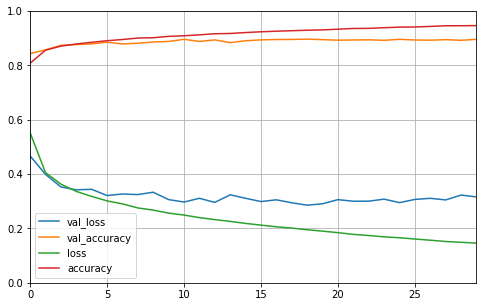

In [88]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

### 結論: 測試集和驗證集的accuracy 有些差異，有些微overfitting

In [98]:
model_2.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/step


[0.5789692057609558, 0.859499990940094]

## 9.Make Predictions

#### 使用模型的predict()方法对新的实例进行预测

In [99]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.15, 0.09, 0.09, 0.11, 0.06, 0.13, 0.13, 0.06, 0.06, 0.11],
       [0.08, 0.08, 0.18, 0.12, 0.06, 0.28, 0.07, 0.04, 0.02, 0.07],
       [0.07, 0.1 , 0.21, 0.09, 0.07, 0.11, 0.11, 0.05, 0.08, 0.11]],
      dtype=float32)

In [100]:
y_pred = model.predict_classes(x_new)
y_pred #尷尬，與y_new不同

array([0, 5, 2], dtype=int64)

In [101]:
import numpy as np
np.array(class_names)[y_pred] #classify all three images correctly

array(['T-shirt/top', 'Sandal', 'Pullover'], dtype='<U11')

In [97]:
# check 
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 10.Saving and Restorning a Model

In [102]:
model_2.save("my_keras_model.h5") #腳本存在資料夾

#### Loading the model

In [103]:
model_2 = keras.models.load_model("my_keras_model.h5")

## 11.Using Callbacks

In [105]:
#build and compile the model
# ModelCheckpoint: saves checkpoints of your model at regular intervals
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history_3 = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 56us/step - loss: 0.1097 - accuracy: 0.9607 - val_loss: 0.3241 - val_accuracy: 0.8996
Epoch 2/10
55000/55000 [==============================] - 3s 63us/step - loss: 0.1079 - accuracy: 0.9615 - val_loss: 0.3313 - val_accuracy: 0.9010
Epoch 3/10
55000/55000 [==============================] - 4s 65us/step - loss: 0.1047 - accuracy: 0.9626 - val_loss: 0.3328 - val_accuracy: 0.8974
Epoch 4/10
55000/55000 [==============================] - 3s 58us/step - loss: 0.1026 - accuracy: 0.9637 - val_loss: 0.3367 - val_accuracy: 0.9004
Epoch 5/10
55000/55000 [==============================] - 4s 64us/step - loss: 0.1002 - accuracy: 0.9639 - val_loss: 0.3288 - val_accuracy: 0.8994
Epoch 6/10
55000/55000 [==============================] - 4s 65us/step - loss: 0.0973 - accuracy: 0.9657 - val_loss: 0.3696 - val_accuracy: 0.8934
Epoch 7/10
55000/55000 [==============================] - 4s 64us/ste

### EarlyStopping
can set a large value since training will stop autimatically when there is no progress

In [106]:
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history_4 = model_2.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb, earlystopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 58us/step - loss: 0.0854 - accuracy: 0.9705 - val_loss: 0.3379 - val_accuracy: 0.9024
Epoch 2/100
55000/55000 [==============================] - 3s 63us/step - loss: 0.0822 - accuracy: 0.9710 - val_loss: 0.3693 - val_accuracy: 0.8984
Epoch 3/100
55000/55000 [==============================] - 3s 62us/step - loss: 0.0820 - accuracy: 0.9711 - val_loss: 0.3735 - val_accuracy: 0.9000
Epoch 4/100
55000/55000 [==============================] - 3s 59us/step - loss: 0.0781 - accuracy: 0.9718 - val_loss: 0.3573 - val_accuracy: 0.9030
Epoch 5/100
55000/55000 [==============================] - 3s 62us/step - loss: 0.0783 - accuracy: 0.9728 - val_loss: 0.3708 - val_accuracy: 0.8982
Epoch 6/100
55000/55000 [==============================] - 4s 64us/step - loss: 0.0739 - accuracy: 0.9747 - val_loss: 0.3785 - val_accuracy: 0.8976
Epoch 7/100
55000/55000 [==============================] - 4s 6

<function matplotlib.pyplot.show(*args, **kw)>

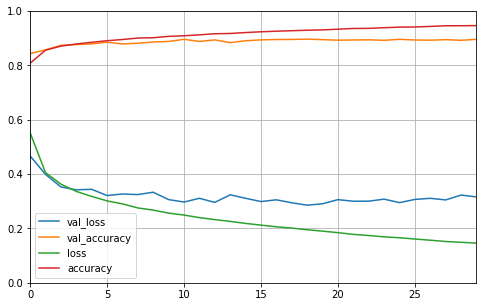

In [107]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

#### 結論: test和validation 的accuracy拉大

## 12.Visualization Using TensorBoard

In [109]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [110]:
run_logdir = get_run_logdir() #EX: './my_logs/run_2019_01_16-11_28_43|'

TF 1.12

In [135]:
pip install tensorflow==1.13.1

Note: you may need to restart the kernel to use updated packages.


In [140]:
tf_upgrade_v2

NameError: name 'tf_upgrade_v2' is not defined

In [147]:
import tensorflow 
import keras
#from tensorflow.keras.models import Sequential
from keras.models import Sequential
#from keras.models import Sequential
model_2 = tensorflow.keras.Sequential()

model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

### Error